# Demonstração

In [26]:
import numpy as np


from sklearn.impute import KNNImputer

In [27]:
X = [[3, 4, 4], [np.nan, 6, 5], [7, 8, np.nan], [8, 8, 7]]

X

[[3, 4, 4], [nan, 6, 5], [7, 8, nan], [8, 8, 7]]

3 4 4
  6 5
7 8
8 8 7

[3, 4, 3] <-
[5.5, 6, 5] <-
[1, 2, 4]
[8, 8, 7]

In [28]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[3., 4., 4.],
       [3., 6., 5.],
       [7., 8., 7.],
       [8., 8., 7.]])

# Exercício

Realizar o Data Inputation utilizando o dataset abaixo para os seguintes casos:

- Valor arbitrário: -100.000.000
- Mediana
- Média
- End of Tail (em +3sigma)
- KNN Inputer

**Dica**: Cuidado para não utilizar o mesmo dataset nos diferentes exercícios

In [29]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv

# Carrega  dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
df = read_csv(url, header=None, na_values='?')

df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [30]:
#Ajuste Para separar a coluna target

target_column = 23
y = df[target_column]
x_columns = df.columns.to_list()
x_columns.remove(target_column)
X = df[x_columns]
X

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,5.0,45.0,8.4,NaN,NaN,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,2.0,50.0,85.0,2.0,2.0,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,NaN,NaN,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,NaN,48.0,7.2,3.0,5.3,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,74.0,7.4,NaN,NaN,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,5.0,55.0,65.0,NaN,NaN,3.0,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,NaN,3.0,3.3,3.0,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.8,NaN,NaN,2.0,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.0,3.0,3.4,1.0,2208,0,0,1


In [31]:
#Total missing
X.isnull().sum()

0       1
1       0
2       0
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
24      0
25      0
26      0
27      0
dtype: int64

## Respostas abaixo:

In [32]:
import pandas as pd
# Método 1: Imputação com valor arbitrário (-100.000.000)
# Cria uma cópia para não afetar o dataset original
X_arbitrary = X.copy()
print("1. Imputação com valor arbitrário (-100.000.000):")
missing_before = X_arbitrary.isnull().sum().sum()
print(f"Valores ausentes antes da imputação: {missing_before}")

# Preenche os valores ausentes com -100.000.000
X_arbitrary = X_arbitrary.fillna(-100000000)
missing_after = X_arbitrary.isnull().sum().sum()
print(f"Valores ausentes após a imputação: {missing_after}")

# Verificando os primeiros registros após a imputação
print("Primeiras linhas após imputação com valor arbitrário:")
X_arbitrary

1. Imputação com valor arbitrário (-100.000.000):
Valores ausentes antes da imputação: 1605
Valores ausentes após a imputação: 0
Primeiras linhas após imputação com valor arbitrário:


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,-100000000.0,2.0,...,5.0,45.0,8.4,-100000000.0,-100000000.0,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,-100000000.0,-100000000.0,4.0,1.0,...,2.0,50.0,85.0,2.0,2.0,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,-100000000.0,-100000000.0,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,-100000000.0,48.0,7.2,3.0,5.3,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,-100000000.0,-100000000.0,6.0,2.0,...,-100000000.0,74.0,7.4,-100000000.0,-100000000.0,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,-100000000.0,120.0,70.0,4.0,-100000000.0,4.0,2.0,...,5.0,55.0,65.0,-100000000.0,-100000000.0,3.0,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,-100000000.0,3.0,3.3,3.0,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.8,-100000000.0,-100000000.0,2.0,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.0,3.0,3.4,1.0,2208,0,0,1


In [33]:
# Método 2: Imputação com mediana
X_median = X.copy()
print("2. Imputação com a mediana:")
missing_before = X_median.isnull().sum().sum()
print(f"Valores ausentes antes da imputação: {missing_before}")

# Preenche os valores ausentes com a mediana de cada coluna
X_median = X_median.fillna(X_median.median())
missing_after = X_median.isnull().sum().sum()
print(f"Valores ausentes após a imputação: {missing_after}")

# Verificando os primeiros registros após a imputação
print("Primeiras linhas após imputação com mediana:")
X_median


2. Imputação com a mediana:
Valores ausentes antes da imputação: 1605
Valores ausentes após a imputação: 0
Primeiras linhas após imputação com mediana:


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,3.0,2.0,...,5.0,45.0,8.4,2.0,2.25,2.0,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,3.0,2.0,4.0,1.0,...,2.0,50.0,85.0,2.0,2.00,3.0,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.7,2.0,2.25,1.0,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,4.0,48.0,7.2,3.0,5.30,2.0,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,3.0,2.0,6.0,2.0,...,4.0,74.0,7.4,2.0,2.25,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,38.2,120.0,70.0,4.0,2.0,4.0,2.0,...,5.0,55.0,65.0,2.0,2.25,3.0,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,7.5,3.0,3.30,3.0,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.8,2.0,2.25,2.0,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.0,3.0,3.40,1.0,2208,0,0,1


In [34]:
# Método 3: Imputação com média
X_mean = X.copy()
print("3. Imputação com a média:")
missing_before = X_mean.isnull().sum().sum()
print(f"Valores ausentes antes da imputação: {missing_before}")

# Preenche os valores ausentes com a média de cada coluna
X_mean = X_mean.fillna(X_mean.mean())
missing_after = X_mean.isnull().sum().sum()
print(f"Valores ausentes após a imputação: {missing_after}")

# Verificando os primeiros registros após a imputação
print("Primeiras linhas após imputação com média:")
X_mean


3. Imputação com a média:
Valores ausentes antes da imputação: 1605
Valores ausentes após a imputação: 0
Primeiras linhas após imputação com média:


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.500000,66.0,28.0,3.000000,3.000000,2.853755,2.00000,...,5.000000,45.0,8.400000,2.037037,3.019608,2.0,11300,0,0,2
1,1.0,1,534817,39.200000,88.0,20.0,2.348361,2.017316,4.000000,1.00000,...,2.000000,50.0,85.000000,2.000000,2.000000,3.0,2208,0,0,2
2,2.0,1,530334,38.300000,40.0,24.0,1.000000,1.000000,3.000000,1.00000,...,1.000000,33.0,6.700000,2.037037,3.019608,1.0,0,0,0,1
3,1.0,9,5290409,39.100000,164.0,84.0,4.000000,1.000000,6.000000,2.00000,...,3.692308,48.0,7.200000,3.000000,5.300000,2.0,2208,0,0,1
4,2.0,1,530255,37.300000,104.0,35.0,2.348361,2.017316,6.000000,2.00000,...,3.692308,74.0,7.400000,2.037037,3.019608,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,38.167917,120.0,70.0,4.000000,2.017316,4.000000,2.00000,...,5.000000,55.0,65.000000,2.037037,3.019608,3.0,3205,0,0,2
296,2.0,1,527702,37.200000,72.0,24.0,3.000000,2.000000,4.000000,2.00000,...,4.000000,44.0,24.456929,3.000000,3.300000,3.0,2208,0,0,1
297,1.0,1,529386,37.500000,72.0,30.0,4.000000,3.000000,4.000000,1.00000,...,5.000000,60.0,6.800000,2.037037,3.019608,2.0,3205,0,0,2
298,1.0,1,530612,36.500000,100.0,24.0,3.000000,3.000000,3.000000,1.00000,...,4.000000,50.0,6.000000,3.000000,3.400000,1.0,2208,0,0,1


In [35]:
# Método 4: Imputação com End of Tail (em +3sigma)
X_tail = X.copy()
print("4. Imputação com End of Tail (+3sigma):")
missing_before = X_tail.isnull().sum().sum()
print(f"Valores ausentes antes da imputação: {missing_before}")

# Para cada coluna, calcular média + 3*desvio padrão
for column in X_tail.columns:
    # Verificar se a coluna tem valores numéricos
    if X_tail[column].dtype.kind in 'if':  # inteiro ou float
        # Calcular média e desvio padrão da coluna
        mean = X_tail[column].mean()
        std = X_tail[column].std()
        
        # Calcular o valor "end of tail" (+3 sigma)
        end_of_tail_value = mean + 3 * std
        
        # Substituir NaN pelo valor calculado
        X_tail[column].fillna(end_of_tail_value, inplace=True)
    else:
        # Se não for numérico, usar o valor mais frequente
        most_frequent = X_tail[column].mode()[0]
        X_tail[column].fillna(most_frequent, inplace=True)

missing_after = X_tail.isnull().sum().sum()
print(f"Valores ausentes após a imputação: {missing_after}")

# Verificando os primeiros registros após a imputação
print("Primeiras linhas após imputação com End of Tail:")
X_tail

4. Imputação com End of Tail (+3sigma):
Valores ausentes antes da imputação: 1605
Valores ausentes após a imputação: 0
Primeiras linhas após imputação com End of Tail:


/var/folders/xz/khfgvmxj4tsd1nl_m4gdk7780000gn/T/ipykernel_79015/4050601855.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_tail[column].fillna(end_of_tail_value, inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1,530101,38.500000,66.0,28.0,3.000000,3.000000,7.714637,2.000000,...,5.000000,45.0,8.400000,4.451751,8.925308,2.0,11300,0,0,2
1,1.0,1,534817,39.200000,88.0,20.0,5.483522,5.144599,4.000000,1.000000,...,2.000000,50.0,85.000000,2.000000,2.000000,3.0,2208,0,0,2
2,2.0,1,530334,38.300000,40.0,24.0,1.000000,1.000000,3.000000,1.000000,...,1.000000,33.0,6.700000,4.451751,8.925308,1.0,0,0,0,1
3,1.0,9,5290409,39.100000,164.0,84.0,4.000000,1.000000,6.000000,2.000000,...,8.167484,48.0,7.200000,3.000000,5.300000,2.0,2208,0,0,1
4,2.0,1,530255,37.300000,104.0,35.0,5.483522,5.144599,6.000000,2.000000,...,8.167484,74.0,7.400000,4.451751,8.925308,2.0,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,40.364783,120.0,70.0,4.000000,5.144599,4.000000,2.000000,...,5.000000,55.0,65.000000,4.451751,8.925308,3.0,3205,0,0,2
296,2.0,1,527702,37.200000,72.0,24.0,3.000000,2.000000,4.000000,2.000000,...,4.000000,44.0,106.881957,3.000000,3.300000,3.0,2208,0,0,1
297,1.0,1,529386,37.500000,72.0,30.0,4.000000,3.000000,4.000000,1.000000,...,5.000000,60.0,6.800000,4.451751,8.925308,2.0,3205,0,0,2
298,1.0,1,530612,36.500000,100.0,24.0,3.000000,3.000000,3.000000,1.000000,...,4.000000,50.0,6.000000,3.000000,3.400000,1.0,2208,0,0,1


In [36]:
# Método 5: Imputação com KNN Imputer
from sklearn.impute import KNNImputer
X_knn = X.copy()
print("5. Imputação com KNN Imputer:")
missing_before = X_knn.isnull().sum().sum()
print(f"Valores ausentes antes da imputação: {missing_before}")

# Aplica o KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # usando 5 vizinhos
X_knn_array = imputer.fit_transform(X_knn)

# Converte o array de volta para DataFrame
X_knn = pd.DataFrame(X_knn_array, columns=X_knn.columns)
missing_after = X_knn.isnull().sum().sum()
print(f"Valores ausentes após a imputação: {missing_after}")

# Verificando os primeiros registros após a imputação
print("Primeiras linhas após imputação com KNN:")
X_knn

5. Imputação com KNN Imputer:
Valores ausentes antes da imputação: 1605
Valores ausentes após a imputação: 0
Primeiras linhas após imputação com KNN:


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,24,25,26,27
0,2.0,1.0,530101.0,38.50,66.0,28.0,3.0,3.0,2.2,2.0,...,5.0,45.0,8.40,2.2,3.96,2.0,11300.0,0.0,0.0,2.0
1,1.0,1.0,534817.0,39.20,88.0,20.0,3.0,2.0,4.0,1.0,...,2.0,50.0,85.00,2.0,2.00,3.0,2208.0,0.0,0.0,2.0
2,2.0,1.0,530334.0,38.30,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,33.0,6.70,2.2,5.18,1.0,0.0,0.0,0.0,1.0
3,1.0,9.0,5290409.0,39.10,164.0,84.0,4.0,1.0,6.0,2.0,...,3.2,48.0,7.20,3.0,5.30,2.0,2208.0,0.0,0.0,1.0
4,2.0,1.0,530255.0,37.30,104.0,35.0,3.0,2.6,6.0,2.0,...,4.2,74.0,7.40,2.4,2.80,2.0,4300.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,533886.0,38.18,120.0,70.0,4.0,3.2,4.0,2.0,...,5.0,55.0,65.00,2.0,1.60,3.0,3205.0,0.0,0.0,2.0
296,2.0,1.0,527702.0,37.20,72.0,24.0,3.0,2.0,4.0,2.0,...,4.0,44.0,7.52,3.0,3.30,3.0,2208.0,0.0,0.0,1.0
297,1.0,1.0,529386.0,37.50,72.0,30.0,4.0,3.0,4.0,1.0,...,5.0,60.0,6.80,1.8,5.44,2.0,3205.0,0.0,0.0,2.0
298,1.0,1.0,530612.0,36.50,100.0,24.0,3.0,3.0,3.0,1.0,...,4.0,50.0,6.00,3.0,3.40,1.0,2208.0,0.0,0.0,1.0


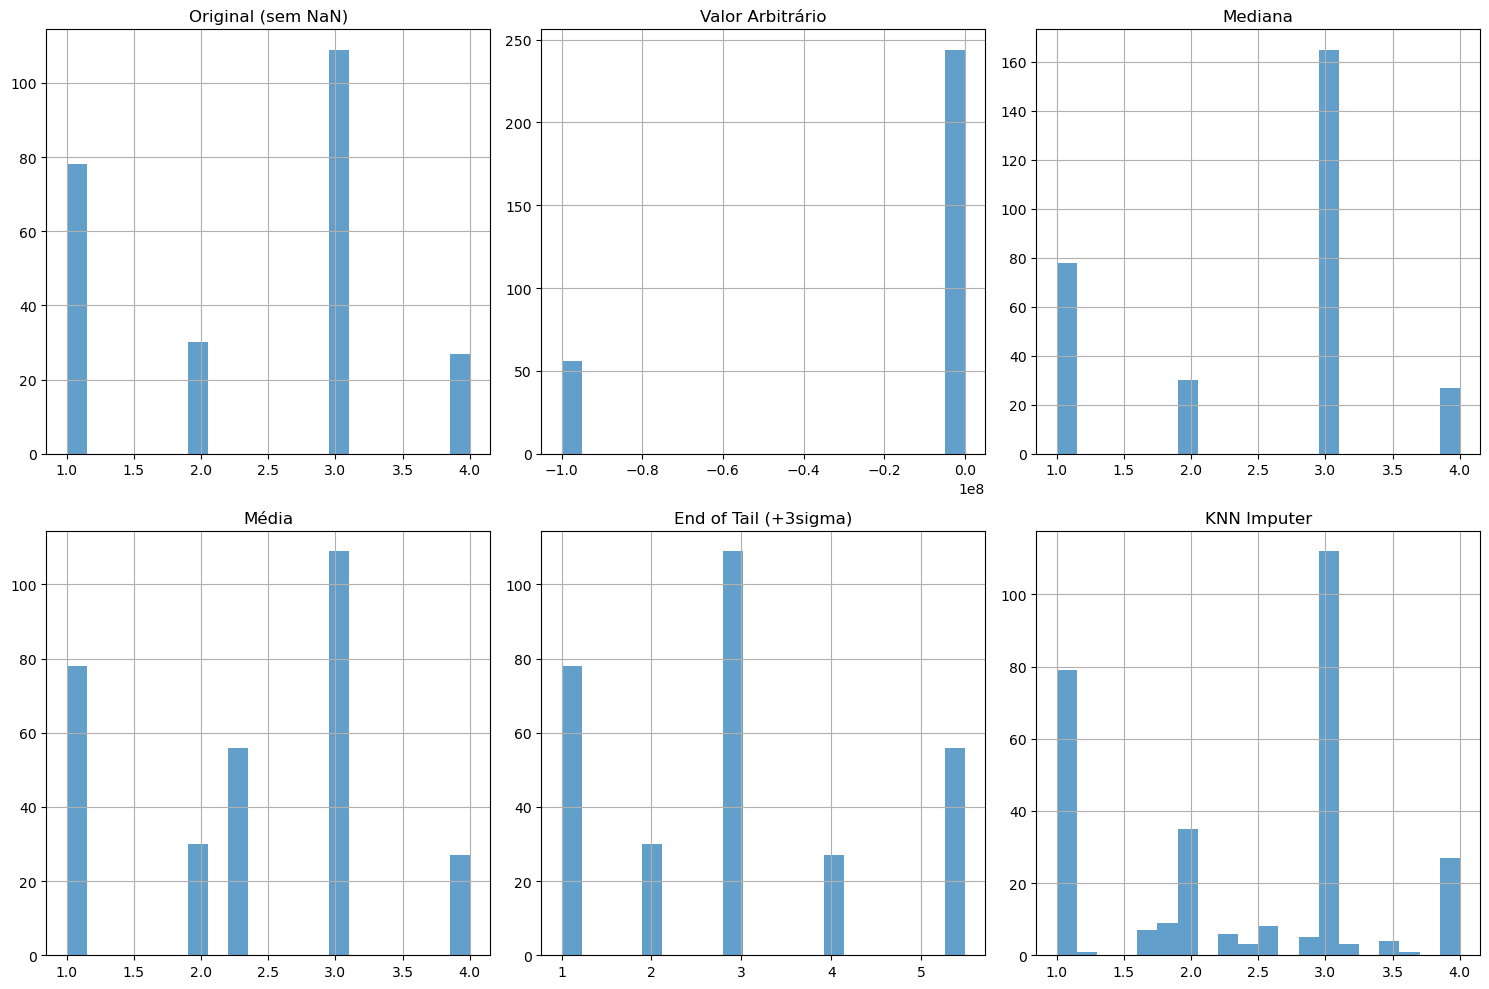

In [37]:










# Comparação dos resultados
import matplotlib.pyplot as plt

# a coluna 6 que tem muitos valores ausentes
column_to_visualize = 6

plt.figure(figsize=(15, 10))

# Dados originais (sem NaN)
plt.subplot(2, 3, 1)
X[column_to_visualize].dropna().hist(bins=20, alpha=0.7)
plt.title('Original (sem NaN)')

# Valor arbitrário
plt.subplot(2, 3, 2)
X_arbitrary[column_to_visualize].hist(bins=20, alpha=0.7)
plt.title('Valor Arbitrário')

# Mediana
plt.subplot(2, 3, 3)
X_median[column_to_visualize].hist(bins=20, alpha=0.7)
plt.title('Mediana')

# Média
plt.subplot(2, 3, 4)
X_mean[column_to_visualize].hist(bins=20, alpha=0.7)
plt.title('Média')

# End of Tail
plt.subplot(2, 3, 5)
X_tail[column_to_visualize].hist(bins=20, alpha=0.7)
plt.title('End of Tail (+3sigma)')

# KNN
plt.subplot(2, 3, 6)
X_knn[column_to_visualize].hist(bins=20, alpha=0.7)
plt.title('KNN Imputer')

plt.tight_layout()
plt.show()



In [38]:
# Resumo da comparação
print("\nEstatísticas comparativas para a coluna", column_to_visualize)
print("\nDados originais (sem NaN):")
X[column_to_visualize].dropna().describe()




Estatísticas comparativas para a coluna 6

Dados originais (sem NaN):


count    244.000000
mean       2.348361
std        1.045054
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: 6, dtype: float64

In [39]:
print("\nApós imputação com valor arbitrário:")
X_arbitrary[column_to_visualize].describe()




Após imputação com valor arbitrário:


count    3.000000e+02
mean    -1.866666e+07
std      3.902948e+07
min     -1.000000e+08
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: 6, dtype: float64

In [40]:
print("\nApós imputação com mediana:")
X_median[column_to_visualize].describe()




Após imputação com mediana:


count    300.000000
mean       2.470000
std        0.975845
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: 6, dtype: float64

In [41]:
print("\nApós imputação com média:")
X_mean[column_to_visualize].describe()



Após imputação com média:


count    300.000000
mean       2.348361
std        0.942120
min        1.000000
25%        1.000000
50%        2.348361
75%        3.000000
max        4.000000
Name: 6, dtype: float64

In [42]:

print("\nApós imputação com End of Tail:")
X_tail[column_to_visualize].describe()




Após imputação com End of Tail:


count    300.000000
mean       2.933591
std        1.544305
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.483522
Name: 6, dtype: float64

In [43]:
print("\nApós imputação com KNN:")
X_knn[column_to_visualize].describe()


Após imputação com KNN:


count    300.000000
mean       2.345333
std        0.979495
min        1.000000
25%        1.000000
50%        2.800000
75%        3.000000
max        4.000000
Name: 6, dtype: float64

As imputações com KNN e mediana preservaram melhor as relações entre variáveis